In [7]:
import numpy as np
from sklearn.base import BaseEstimator
from scipy.stats import bernoulli
from collections import Counter

# Task 1

Consider a `SporadicClassifier` that returns a random label in {`True`, `False`} for any test input that’s fed to it. This classifier does not require any training! Hope, that was already obvious to you. Implement this `SporadicClassifier` as a Python class by extending the `BaseEstimator` class of sklearn, so that you have mandatory methods such as `fit(X, y)` and `predict(X)` are implemented. As your guess, the `fit()` method would be a dummy ‘pass’, but the `predict()` method would return `True` or `False` randomly.

In [8]:
class SporadicClassifier(BaseEstimator):
    def __init__(self, p=0.5, method='uniform_random'):
        self.p = 0.5 if p < 0.0 or p > 1.0 else p
        self.method = method if method in ["uniform_random", "bernoulli", "normal"] else "uniform_random"
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        # we center the normal distribution at 0.5 instead of 0.0
        if self.method == "gaussian":
            return (0.5 + np.random.randn(len(X))) < self.p
        elif self.method == "bernoulli":
            return np.bool_(bernoulli.rvs(self.p, size=len(X)))
        else:
            return np.random.rand(len(X)) < self.p

In [9]:
 np.random.randn(150)+0.5

array([ 0.66305999, -0.05544821,  0.77904121,  1.99606011, -0.71317197,
        0.86321799,  0.31335898,  0.66475438, -0.24203195,  2.02136232,
        1.77113106,  0.57870491,  1.41738679,  0.41749751,  1.43025464,
        0.83565016, -0.30761356,  2.67314127,  0.94122784, -0.49667447,
        0.84101392,  1.02931761,  0.67086692,  1.53173734,  2.22740623,
        0.14379166,  0.06493686,  2.11591916,  0.36559112,  1.06491329,
        0.65653035,  0.80175574,  2.05785099,  0.0196827 ,  0.07026642,
        1.01222604, -0.62229241,  1.25470626,  1.19788941,  0.67364084,
       -0.74264274, -0.53411671, -0.08304147,  0.09934913,  0.07829527,
        1.35529873,  0.39403528,  0.17149691,  1.57991104,  2.74236707,
        0.90843391, -0.1781498 ,  2.14902834, -0.9755286 ,  0.59864212,
        0.2559173 ,  0.88369668, -0.66591576,  2.38215753, -0.42194276,
        0.02737429,  0.59807162,  1.6532749 ,  0.83568692, -0.24508952,
       -0.50222095, -0.48158918,  1.76607069,  0.11825147, -1.03

__it does not matter what the dataset is, as the classifier is not depending on the inputs__

In [10]:
# let's create a dataset of size 100 instances.
X = np.random.rand(100)

__let's compute the label distribution for different configuration of the classifier__

In [11]:
cla = SporadicClassifier(p=0.3, method='gaussian')
y = cla.predict(X)
c = Counter(y) 
{i[0]: i[1] / len(y) for i in c.items()}


{True: 0.27, False: 0.73}

__create reusable functions__

In [12]:
def compute_prior(y):
    # initialize the counter object on the 'y' labels
    c = Counter(y)
    # convert the labels into class proportions
    props = {i[0]:i[1]/len(y) for i in c.items()}
    if True not in props:
        props[True] = 0.0
    if False not in props:
        props[False] = 0.0
    return props

__extract the probability of True predictions for the dataset using different random generators__

In [13]:
y

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True])

In [14]:
p_vals = np.arange(0., 1.1, 0.1)
b_vals = []
g_vals = []
u_vals = []
for p in p_vals:
    # spawn the sporadic classifier with bernouli random sample generator
    cla = SporadicClassifier(p=p, method='bernoulli')
    # predict the labels for the input
    y = cla.predict(X)
    # compute priors
    props = compute_prior(y)
    # pick the probabilty of True class
    b_vals.append(props[True])
    
    # spawn the sporadic classifier with gaussian random sample generator
    y = SporadicClassifier(p=p, method='gaussian').predict(X)
    g_vals.append(compute_prior(y)[True])
    
    # spawn the sporadic classifier with uniform random sample generator
    y = SporadicClassifier(p=p, method='uniform_random').predict(X)
    u_vals.append(compute_prior(y)[True])

__plot the trends side on the same plot for comparison__

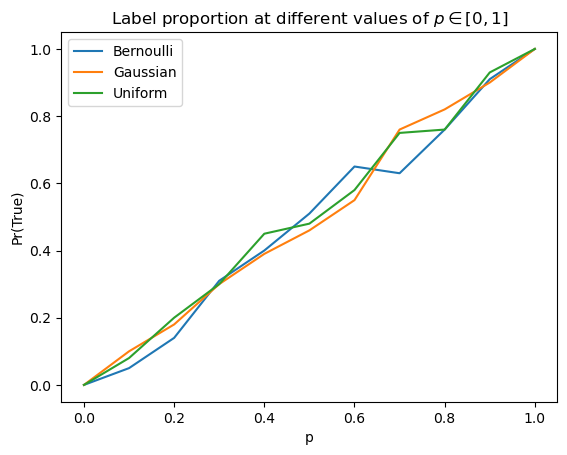

In [15]:
import matplotlib.pyplot as plt
plt.plot(p_vals, b_vals)
plt.plot(p_vals, g_vals)
plt.plot(p_vals, u_vals)
plt.xlabel('p')
plt.ylabel('Pr(True)')
plt.title('Label proportion at different values of $p\in[0,1]$')
plt.legend(['Bernoulli','Gaussian','Uniform'], loc='upper left')
plt.show()

__if the number of samples is increased, the plots tend to understandably become a straight line__

# Task 2

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load and convert IRIS dataset to binary
iris = load_iris()
X, y = iris.data, iris.target

import pandas as pd
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
dtype: int64

In [18]:
# Convert to binary: Setosa = True (1), Others = False (0)
y_binary = (y == 1).astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42) #We are splitting into test and train parts just for the sake of it


Computing prior

In [34]:
iris_prior=compute_prior(y_binary)
iris_prior

{0: 0.6666666666666666, 1: 0.3333333333333333}

so prior is P(true)=0.33

In [19]:
# Task 2: Precision, Recall, F1-score, PRC, ROC, AUPRC, AUROC
precision_vals, recall_vals, f1_vals = [], [], []
fpr_vals=[]
auprc_vals, auroc_vals = [], []

for p in p_vals:
    # Instantiate and predict with Bernoulli DummyBinaryClassifier
    clf = SporadicClassifier(method='bernoulli', p=p)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X)
    
    # Calculate metrics
    precision = precision_score(y_binary, y_pred)
    recall = recall_score(y_binary, y_pred)
    f1 = f1_score(y_binary, y_pred)
    
    precision_vals.append(precision)
    recall_vals.append(recall)
    f1_vals.append(f1)
    
    # PRC and ROC curves
    #tpr is same as recall so we calculate only fpr
    tp = np.sum((y_binary == 1) & (y_pred == 1))
    fp = np.sum((y_binary == 0) & (y_pred == 1))
    fn = np.sum((y_binary== 1) & (y_pred == 0))
    tn = np.sum((y_binary== 0) & (y_pred == 0))

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    fpr_vals.append(fpr)

    


c:\Users\Mansha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

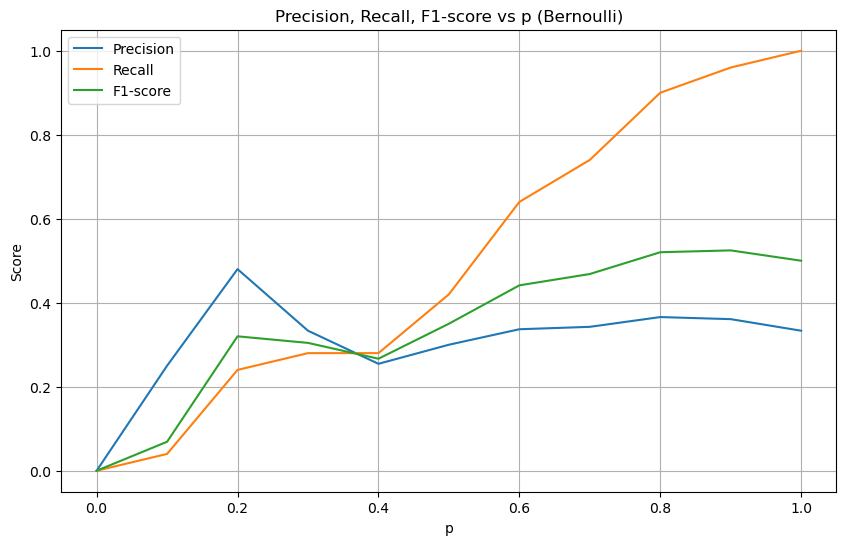

In [21]:
# Plotting Precision, Recall, F1-score
plt.figure(figsize=(10, 6))
plt.plot(p_vals, precision_vals, label='Precision')
plt.plot(p_vals, recall_vals, label='Recall')
plt.plot(p_vals, f1_vals, label='F1-score')
plt.xlabel('p')
plt.ylabel('Score')
plt.title('Precision, Recall, F1-score vs p (Bernoulli)')
plt.legend()
plt.grid(True)
plt.show()


We can see that before a threshold p, precision, recall and f1 score increase with increase in value of p. After a certain p (around 0.6), the precision and F1 score become almostconstant while p increases with increase in the value of p. Precision increases with p because the model is more likely to predict positive instances when the true positive rate is higher.

In [22]:
print(p_vals)
print(recall_vals)
print(precision_vals)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.0, 0.04, 0.24, 0.28, 0.28, 0.42, 0.64, 0.74, 0.9, 0.96, 1.0]
[0.0, 0.25, 0.48, 0.3333333333333333, 0.2545454545454545, 0.3, 0.3368421052631579, 0.3425925925925926, 0.36585365853658536, 0.3609022556390977, 0.3333333333333333]


In [23]:
paired_vals = list(zip(recall_vals, precision_vals))
# Sort by recall values (which is the first element in the pair)
sorted_pairs = sorted(paired_vals, key=lambda x: x[0])
# Unzip the sorted pairs back into two separate arrays
sorted_recall_vals, sorted_precision_vals = zip(*sorted_pairs)

sorted_recall_vals = list(sorted_recall_vals)
sorted_precision_vals = list(sorted_precision_vals)

print("Sorted Recall Values:", sorted_recall_vals)
print("Sorted Precision Values:", sorted_precision_vals)


Sorted Recall Values: [0.0, 0.04, 0.24, 0.28, 0.28, 0.42, 0.64, 0.74, 0.9, 0.96, 1.0]
Sorted Precision Values: [0.0, 0.25, 0.48, 0.3333333333333333, 0.2545454545454545, 0.3, 0.3368421052631579, 0.3425925925925926, 0.36585365853658536, 0.3609022556390977, 0.3333333333333333]


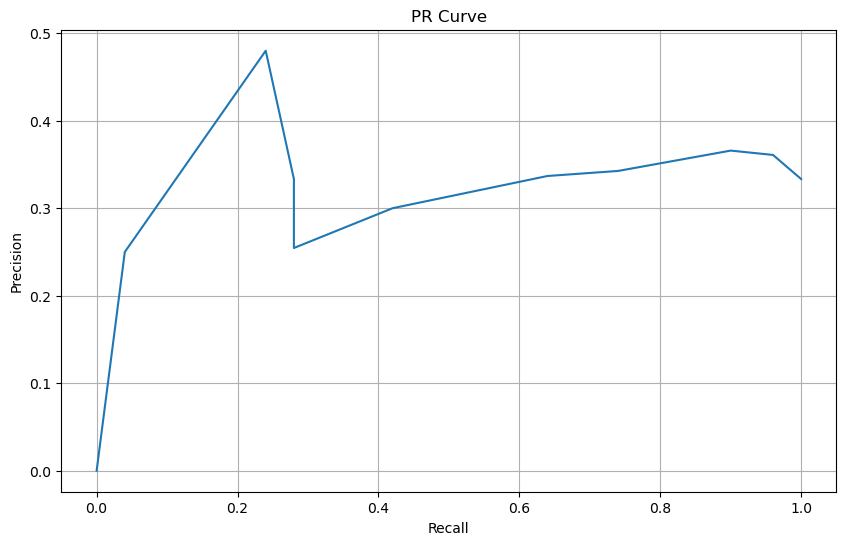

In [24]:
# Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(sorted_recall_vals, sorted_precision_vals,'-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.grid(True)
plt.show()


In [25]:
paired_vals = list(zip(recall_vals,fpr_vals))
# Sort by recall values 
sorted_pairs = sorted(paired_vals, key=lambda x: x[0])
# Unzip the sorted pairs back into two separate arrays
s_fpr_vals,s_recall_vals = zip(*sorted_pairs)

s_fpr_vals = list(s_fpr_vals)
s_recall_vals = list(s_recall_vals)


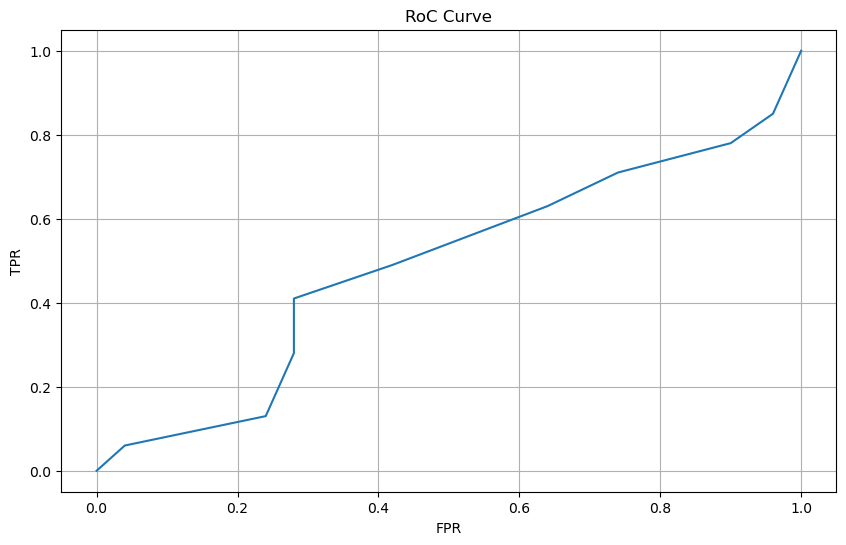

In [26]:
# RoC Curve
plt.figure(figsize=(10, 6))
plt.plot(s_fpr_vals,s_recall_vals,'-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RoC Curve')
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import auc
auprc = auc(sorted_recall_vals,sorted_precision_vals)
print("AUPRC:", auprc)

AUPRC: 0.3294723042516367


In [28]:
auroc = auc(s_fpr_vals, s_recall_vals)
print("AUROC:", auroc)

AUROC: 0.4867


So, AUPRC is 0.33 and AUROC is 0.48
The AUROC shows a 49% probability of correctly classifying a datapoint correctly. Since it is ~0.5, this shows that our classifier is a random one. The AUPRC<0.5 shows that our classifier, though random, has performance worse than a random classifier on an average (expected auprc=0.5). This maybe due to data imbalance since we have twice as many entries for False labels than for True ones.

# Task 3

In [29]:
import matplotlib.colors as colors
p_val=[0.0,0.25,0.50,0.75,1.00]
X=pd.DataFrame(X)

In [30]:
x1 = X.iloc[:, 0]  # 1st column
x2 = X.iloc[:, 1]  # 2nd column
grid_x1 = np.linspace(x1.min(), x1.max(), 100)
grid_x2 = np.linspace(x2.min(), x2.max(), 100)
x1v, x2v = np.meshgrid(grid_x1, grid_x2)
test_data = pd.DataFrame(data=np.column_stack((x1v.flatten(), x2v.flatten())), columns=X.columns[[0,1]])
x3 = X.iloc[:, 2]  # 3rd column
x4 = X.iloc[:, 3]  # 4th column
grid_x3 = np.linspace(x3.min(), x3.max(), 100)
grid_x4 = np.linspace(x4.min(), x4.max(), 100)
x3v, x4v = np.meshgrid(grid_x3, grid_x4)
test_data_34 = pd.DataFrame(data=np.column_stack((x3v.flatten(), x4v.flatten())), columns=X.columns[[2,3]])
test_yhat_34 = clf.predict(test_data_34)


We will now plot the decision boundary between sepal width & sepal length AND petal length & petal width for all the three distributions.

In [31]:
cmap = colors.ListedColormap(['magenta', 'yellow'])
norm = colors.BoundaryNorm([0, 0.5, 1], cmap.N)  # Discrete norm between 0 and 1

FOR BERNOULLI DISTRIBUTION
Predictions for p=0.0: [0]


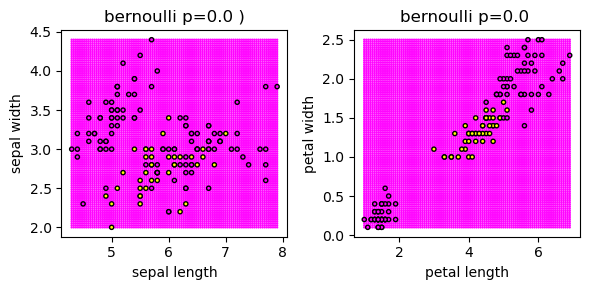

Predictions for p=0.25: [0 1]


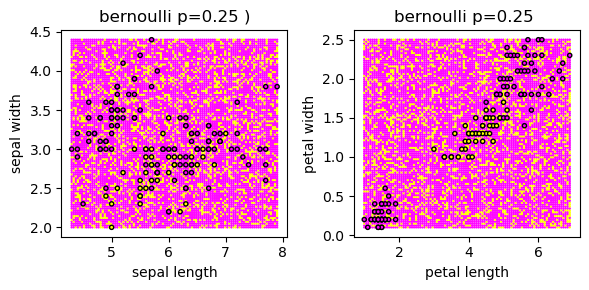

Predictions for p=0.5: [0 1]


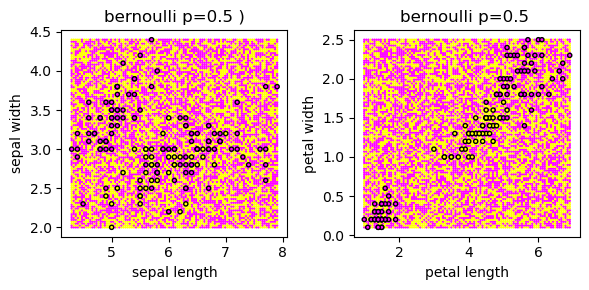

Predictions for p=0.75: [0 1]


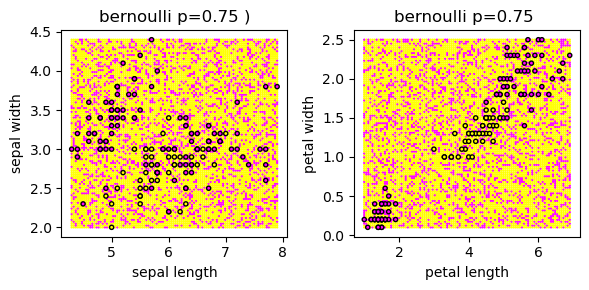

Predictions for p=1.0: [1]


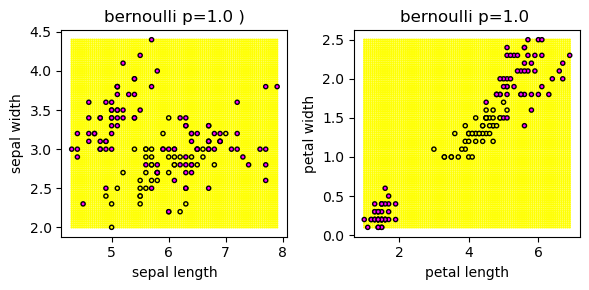

FOR UNIFORM DISTRIBUTION
Predictions for p=0.0: [0]


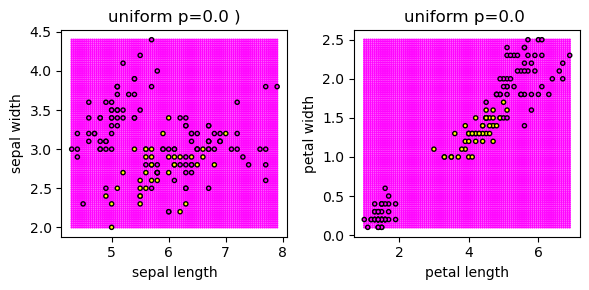

Predictions for p=0.25: [0 1]


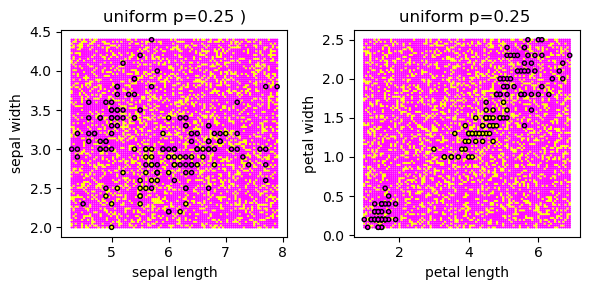

Predictions for p=0.5: [0 1]


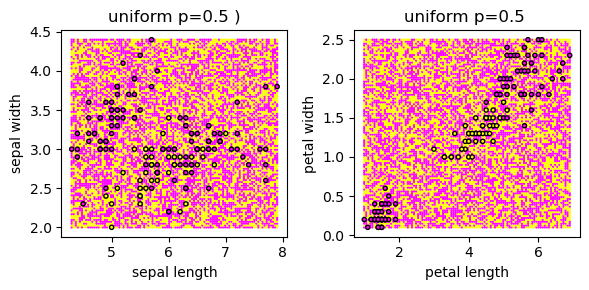

Predictions for p=0.75: [0 1]


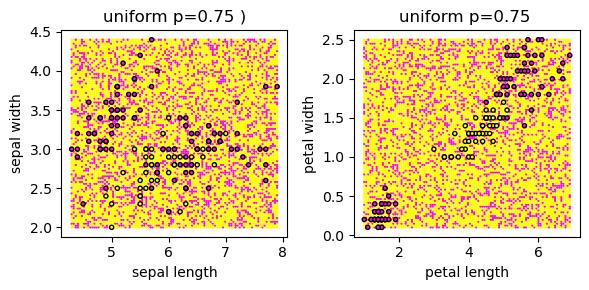

Predictions for p=1.0: [1]


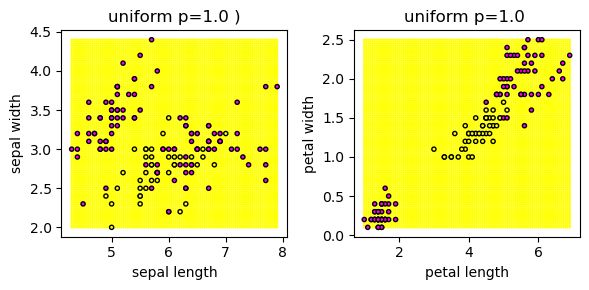

FOR GAUSSIAN DISTRIBUTION
Predictions for p=0.0: [0]


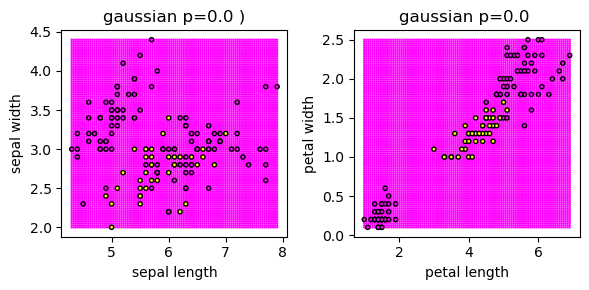

Predictions for p=0.25: [0 1]


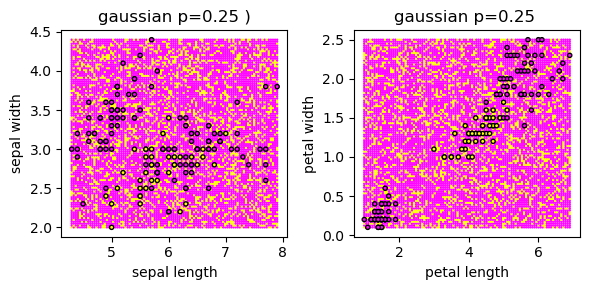

Predictions for p=0.5: [0 1]


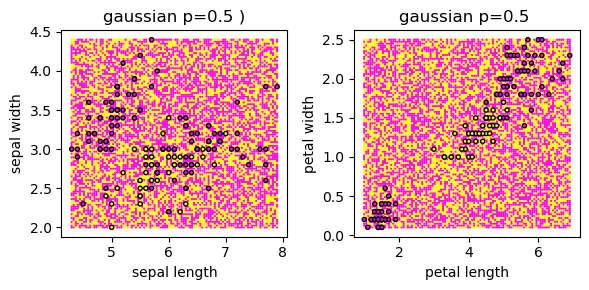

Predictions for p=0.75: [0 1]


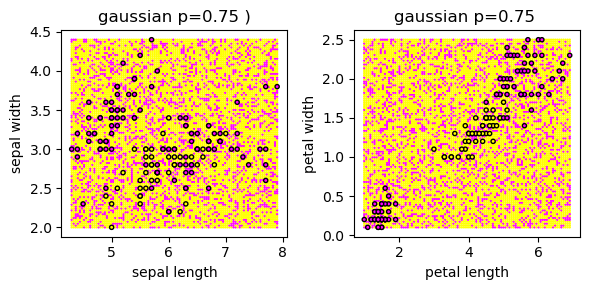

Predictions for p=1.0: [1]


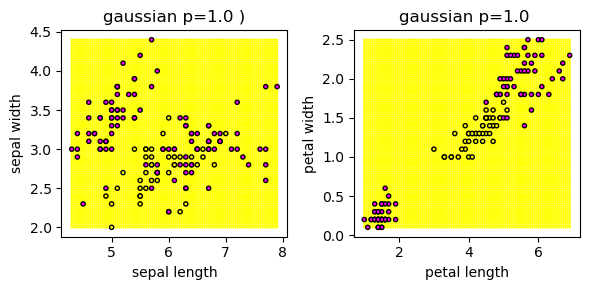

In [32]:
for distribution in ['bernoulli','uniform','gaussian']:
    print("FOR {} DISTRIBUTION".format(distribution.upper()))
    for p in p_val:
        clf = SporadicClassifier(method=distribution, p=p)
        clf.fit(X, y_binary) # doesn't do anything but fitting just for convention
    
        # Predict on the test grid (column 1 and 2)  
        test_yhat = clf.predict(test_data).astype(int)
        print(f"Predictions for p={p}: {np.unique(test_yhat)}") 
    
        fig, ax = plt.subplots(1, 2, figsize=(6,  3))

        # Plot for x1 and x2 (1st and 2nd columns of X)
        ax[0].scatter(x1v, x2v, marker='.', s=2, c=test_yhat, cmap=cmap, norm=norm)
        ax[0].scatter(x1, x2, marker='.', c=y_binary, cmap=cmap, edgecolor='k',norm=norm)
        ax[0].set_title("{} p={} )".format(distribution,p))
        ax[0].set_xlabel('sepal length')
        ax[0].set_ylabel('sepal width')

        #Predict on the test grid (column 1 and 2) and convert to integers
        test_yhat_34 = clf.predict(test_data_34).astype(int)

        # Plot for x3 and x4 (3rd and 4th columns of X)
        ax[1].scatter(x3v, x4v, marker='.', s=2, c=test_yhat_34, cmap=cmap, norm=norm)
        ax[1].scatter(x3, x4, marker='.', c=y_binary, cmap=cmap, edgecolor='k',norm=norm)
        ax[1].set_title("{} p={} ".format(distribution,p))
        ax[1].set_xlabel('petal length')
        ax[1].set_ylabel('petal width')

        plt.tight_layout()
        plt.show()
    



Since it is a random classifier, we get unclear and poorly-defined decision boundaries for all values of p. However, at extreme values of p (0 or 1), the boundaries become constant since random generator would generate probability values <=1 and >=0 in all cases, classifying all points as either True (for p=1) or False (for p=0), while intermediate values show more mixed and random boundary behavior.